In [30]:
import pandas as pd 
from sklearn.decomposition import PCA

In [31]:
import pickle
with open('creditcard_df_scaled.pickle', 'rb') as f:
    creditcard_df_scaled = pickle.load(f)


In [32]:
# Obtain the principal components 
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(creditcard_df_scaled)
principal_comp

array([[-1.68222141, -1.076448  ],
       [-1.1382909 ,  2.50645453],
       [ 0.96967277, -0.38346785],
       ...,
       [-0.92620601, -1.8107762 ],
       [-2.33655198, -0.65796574],
       [-0.55642395, -0.40045445]])

In [33]:
# Create a dataframe with the two components
pca_df = pd.DataFrame(data = principal_comp, columns =['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-1.682221,-1.076448
1,-1.138291,2.506455
2,0.969673,-0.383468
3,-0.873627,0.043158
4,-1.599435,-0.688577


In [34]:
from sklearn.cluster import KMeans
kmeans = KMeans(8)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

In [35]:
# Concatenate the clusters labels to the dataframe
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682221,-1.076448,2
1,-1.138291,2.506455,1
2,0.969673,-0.383468,6
3,-0.873627,0.043158,2
4,-1.599435,-0.688577,2


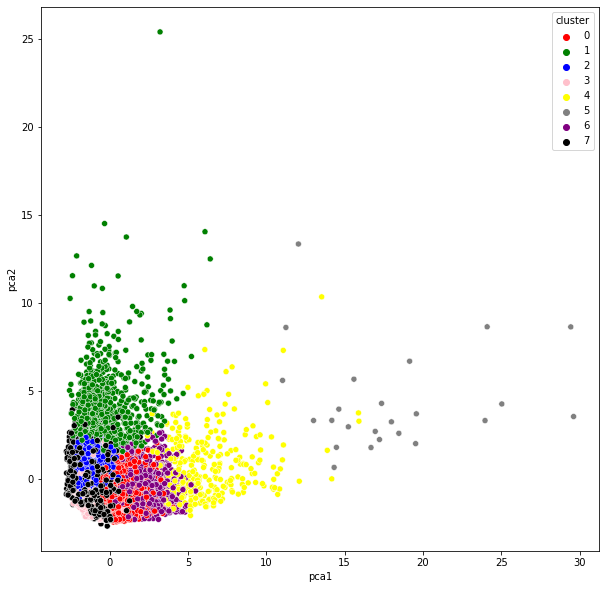

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns 
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','pink','yellow','gray','purple', 'black'])
plt.show()